In [1]:
import numpy as np
import pandas as pd

In [2]:
# 데이터 가져오기
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
# 데이터 확인
train_df.shape, test_df.shape

# train에는 10000개의 데이터가 있고, test에는 2062개의 데이터가 있다.
# train에는 18개의 컬럼이 있고, test에는 17개의 컬럼이 있다.

((10000, 18), (2062, 17))

In [4]:
# 컬럼 확인
train_df.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [5]:
test_df.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수'],
      dtype='object')

In [31]:
# 예측해야할 컬럼
train_target = train_df['채무 불이행 여부']

In [39]:
# 채무 불이행 여부 데이터 비율
train_target[train_target == 0].count() / len(train_target), train_target[train_target == 1].count() / len(train_target)

(np.float64(0.6588), np.float64(0.3412))

In [ ]:
# 채무 불이행 여부 데이터 비율이 대체로 균형적임

In [7]:
# 숫치형 데이터와 범주형 데이터 분리

train_num = train_df.select_dtypes(include=np.number)
train_obj = train_df.select_dtypes(exclude=np.number)

In [ ]:
# 숫자형 데이터 정보
train_num.info()

# 결측치 없음


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   연간 소득              10000 non-null  float64
 1   체납 세금 압류 횟수        10000 non-null  float64
 2   개설된 신용계좌 수         10000 non-null  int64  
 3   신용 거래 연수           10000 non-null  float64
 4   최대 신용한도            10000 non-null  float64
 5   신용 문제 발생 횟수        10000 non-null  int64  
 6   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 7   개인 파산 횟수           10000 non-null  int64  
 8   현재 대출 잔액           10000 non-null  float64
 9   현재 미상환 신용액         10000 non-null  float64
 10  월 상환 부채액           10000 non-null  float64
 11  신용 점수              10000 non-null  int64  
 12  채무 불이행 여부          10000 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 1015.8 KB


In [ ]:
# 문자형 데이터 정보
train_obj.info()

# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UID          10000 non-null  object
 1   주거 형태        10000 non-null  object
 2   현재 직장 근속 연수  10000 non-null  object
 3   대출 목적        10000 non-null  object
 4   대출 상환 기간     10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


In [ ]:
# 숫자 데이터 요약
train_num.describe()


,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


In [11]:
# 확인이 필요한 컬럼
# 체납 세금 압류 횟수 75% 0 
# 신용 문제 발생 횟수 50% 0, 75% 1
# 개인 파산 횟수 75% 0

In [12]:
# 체납 세금 압류 횟수 비율
train_num['체납 세금 압류 횟수'].value_counts() / len(train_num)

체납 세금 압류 횟수
0.0    0.8826
1.0    0.0884
4.0    0.0176
2.0    0.0060
5.0    0.0037
7.0    0.0010
3.0    0.0004
6.0    0.0003
Name: count, dtype: float64

In [ ]:
# 체납 세금 압류 횟수 0의 비율이 0.8826, 그 이외의 비율 0.1174
# 체납 세금 압류 횟수 컬럼은 범주형 데이터로 변환
# 0일 때, 0 아닐 때
# 순서 존재

In [16]:
# 신용 문제 발생 횟수 비율
train_num['신용 문제 발생 횟수'].value_counts() / len(train_num)

신용 문제 발생 횟수
0    0.6621
1    0.2149
2    0.0689
5    0.0248
6    0.0157
4    0.0093
3    0.0030
7    0.0013
Name: count, dtype: float64

In [21]:
# 신용 문제 발생 횟수 0의 비율 0.6621, 1의 비율 0.2149, 그 이외의 비율 0.123
# 신용 문제 발생 횟수 컬럼 수치형 -> 범주형으로 변환 필요
# 0, 1, 그 이외
# 순서가 존재 ordinal data

In [20]:
# 개인 파산 횟수 비율
train_num['개인 파산 횟수'].value_counts() / len(train_num)

개인 파산 횟수
0    0.7886
1    0.1268
3    0.0772
2    0.0074
Name: count, dtype: float64

In [28]:
# 개인 파산 횟수 0의 비율 0.7886, 1의 비율 0.1268, 그 이외의 비율 0.0846
# 개인 파산 횟수 컬럼 수치형 -> 범주형으로 변환 필요
# 0, 1, 그 이외
# 순서가 존재 ordinal data

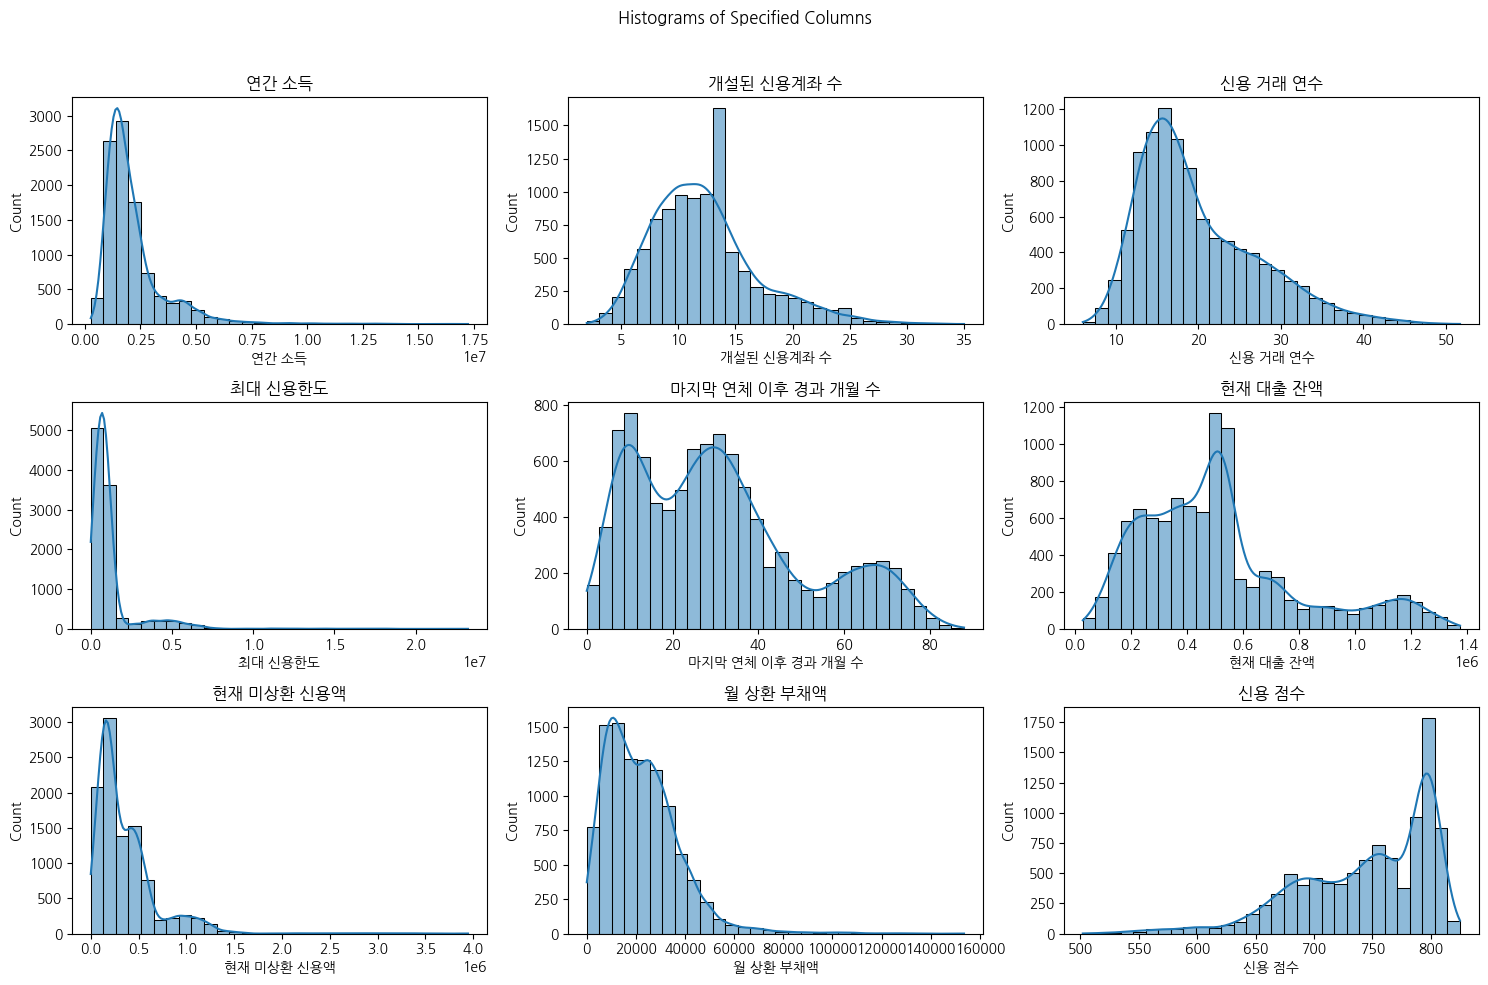

In [59]:
# 나머지 수치형 데이터 시각화

import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

columns_to_plot = [
    '연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
    '마지막 연체 이후 경과 개월 수', '현재 대출 잔액', '현재 미상환 신용액',
    '월 상환 부채액', '신용 점수'
]

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_num[column], bins=30, kde=True)
    plt.title(column)

plt.suptitle('Histograms of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# 모든 데이터 정규분포도와 비슷하게 스케일링 할 필요

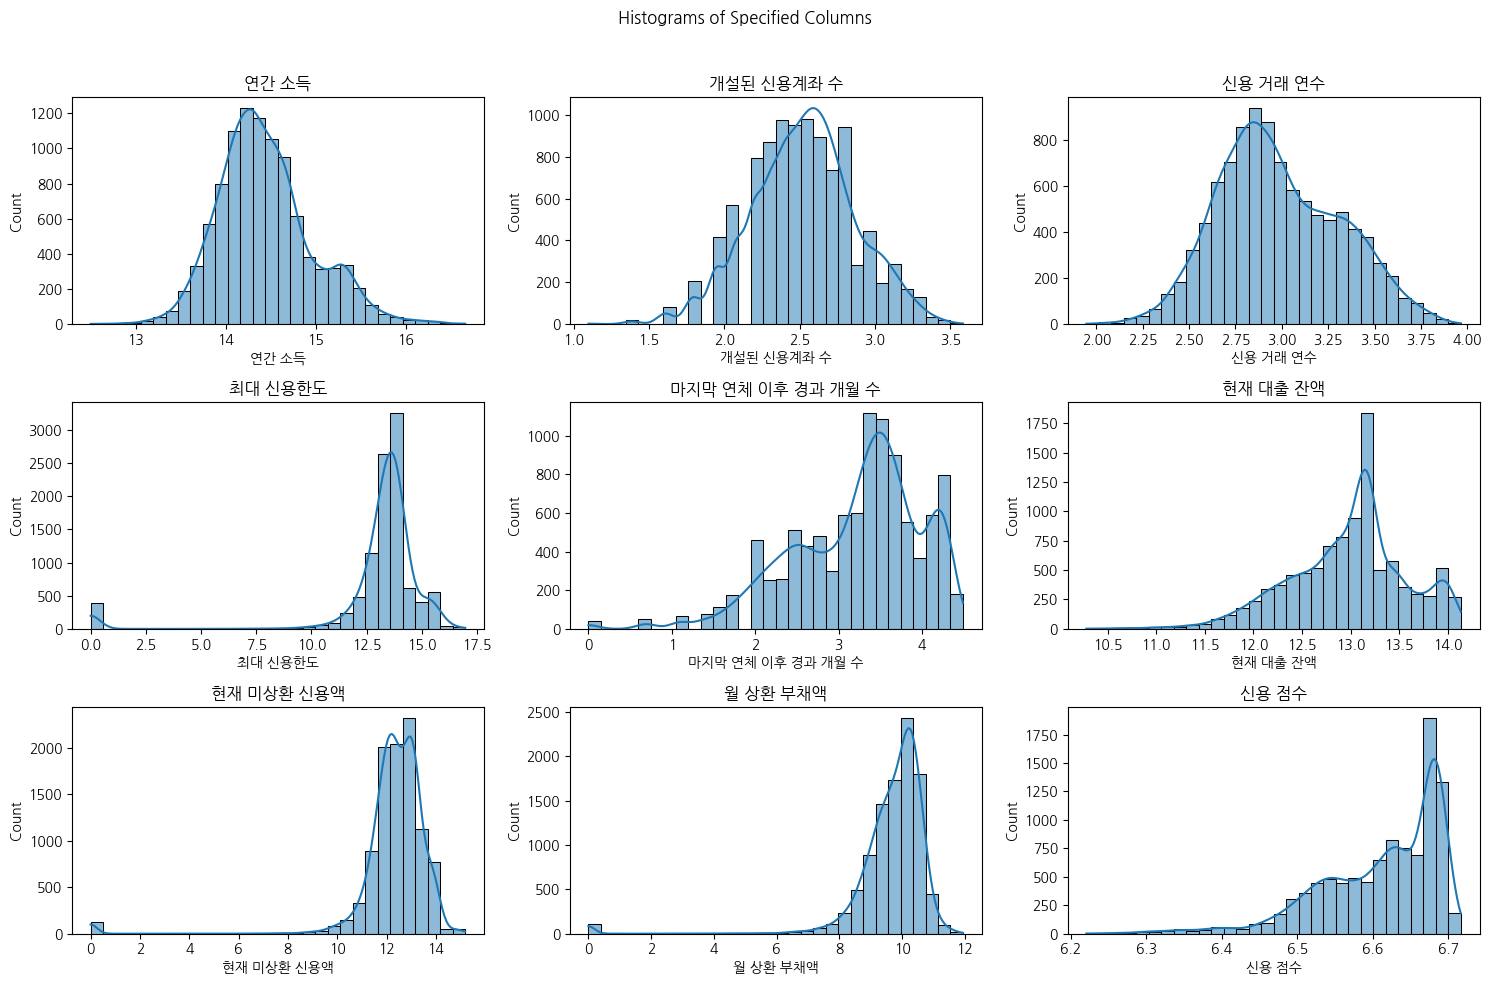

In [73]:
# log 적용해보기

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(np.log1p(train_num[column]), bins=30, kde=True)
    plt.title(column)

plt.suptitle('Histograms of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# log 적용 시 연간 소득, 개설된 신용계좌 수, 신용 거래 연수 는 정규 분포와 유사하게 나타남 -> 이 컬럼들은 log 적용
# 최대 신용한도, 현재 미상환 신용액, 월 상환 부채액 은 제곱근 해보기

In [82]:
columns_to_log = ['연간 소득', '개설된 신용계좌 수', '신용 거래 연수']

In [85]:
# 로그 취한 후 이상치 비율 

outlier_counts = {}

for column in columns_to_log:
    Q1 = np.log1p(train_num[column].quantile(0.25))
    Q3 = np.log1p(train_num[column].quantile(0.75))
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_num[(np.log1p(train_num[column]) < lower_bound) | (np.log1p(train_num[column]) > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

print("이상치 개수:")
print()

for column, count in outlier_counts.items():
    print(f"{column}: {count} 개")
    print(f'비율: {count/10000}')
    print()

이상치 개수:

연간 소득: 229 개
비율: 0.0229

개설된 신용계좌 수: 31 개
비율: 0.0031

신용 거래 연수: 4 개
비율: 0.0004



In [86]:
# 비율이 매우 적음 -> 이상치들 삭제해도 무방

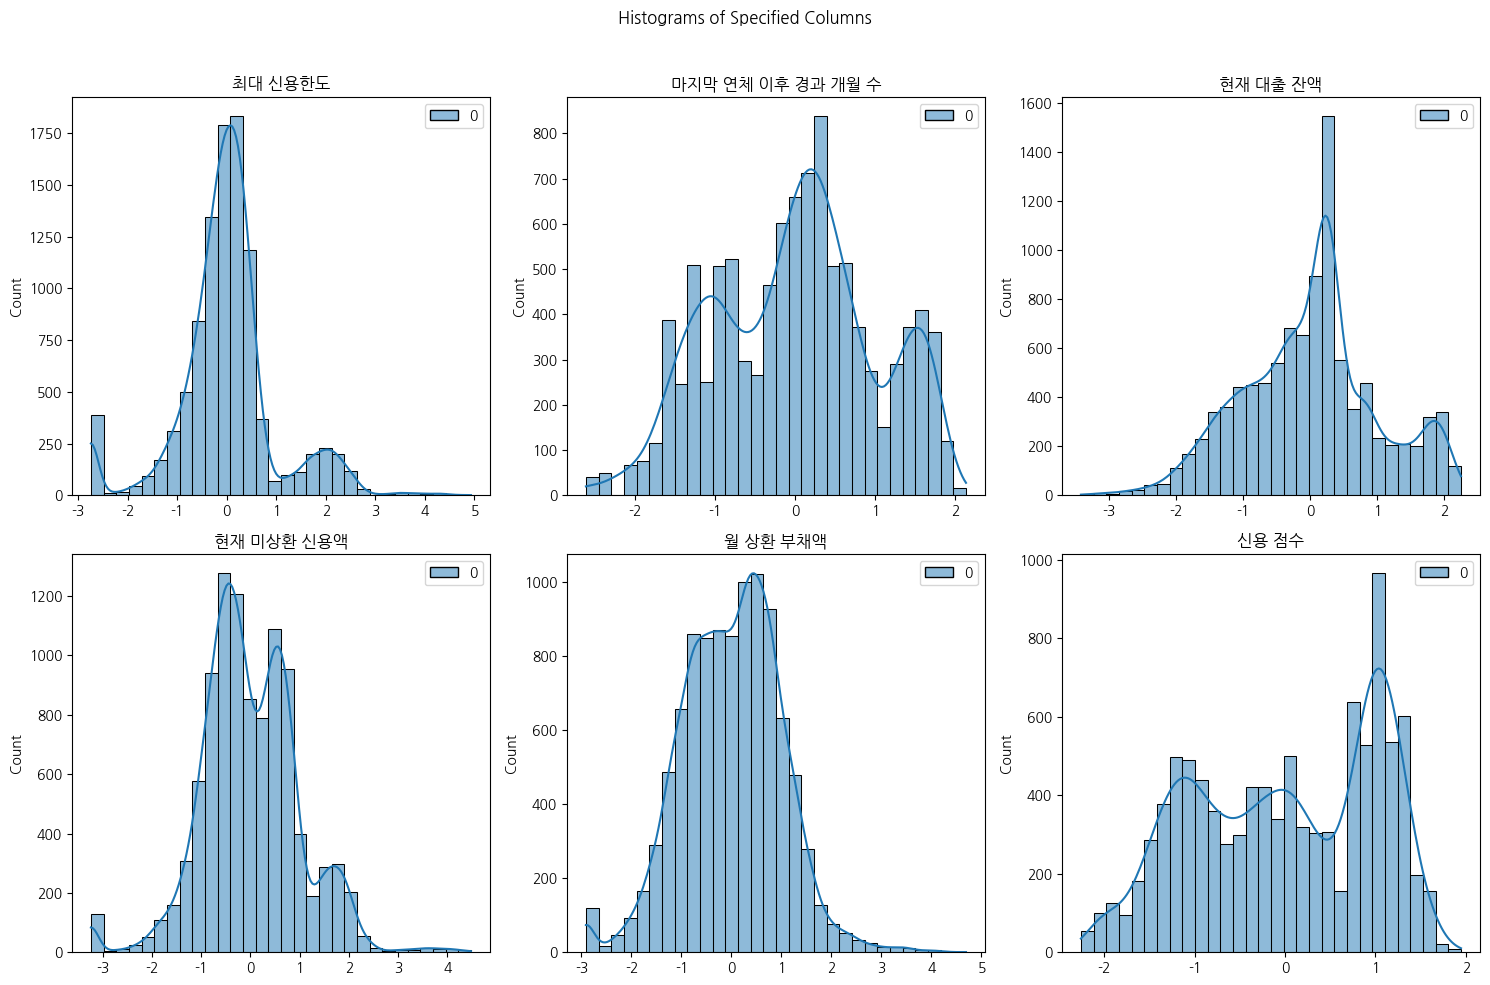

In [88]:
# Power Transformer 적용

columns_to_power_transformer = ['최대 신용한도',
    '마지막 연체 이후 경과 개월 수', '현재 대출 잔액', '현재 미상환 신용액',
    '월 상환 부채액', '신용 점수'
]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()


plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_power_transformer, 1):
    plt.subplot(2, 3, i)
    sns.histplot(scaler.fit_transform(train_num[[column]]), bins=30, kde=True)
    plt.title(column)

plt.suptitle('Histograms of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [89]:
# Power Transformer 적용 시 월 상환 부채액은 정규 분포와 유사하게 나타남 -> 이 컬럼들은 Power Transformer 적용

In [ ]:
# Power Transformer 적용 후 이상치 비율 
columns_to_power_transformer = ['월 상환 부채액']
outlier_counts = {}



for column in columns_to_power_transformer:
    Q1 = scaler.fit_transform(train_num[column].quantile(0.25))
    Q3 = scaler.fit_transform(train_num[column].quantile(0.75))
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_num[(scaler.fit_transform(train_num[column]) < lower_bound) | (scaler.fit_transform(train_num[column]) > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

print("이상치 개수:")
print()

for column, count in outlier_counts.items():
    print(f"{column}: {count} 개")
    print(f'비율: {count/10000}')
    print()

ValueError: Expected 2D array, got scalar array instead:
array=10893.75.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

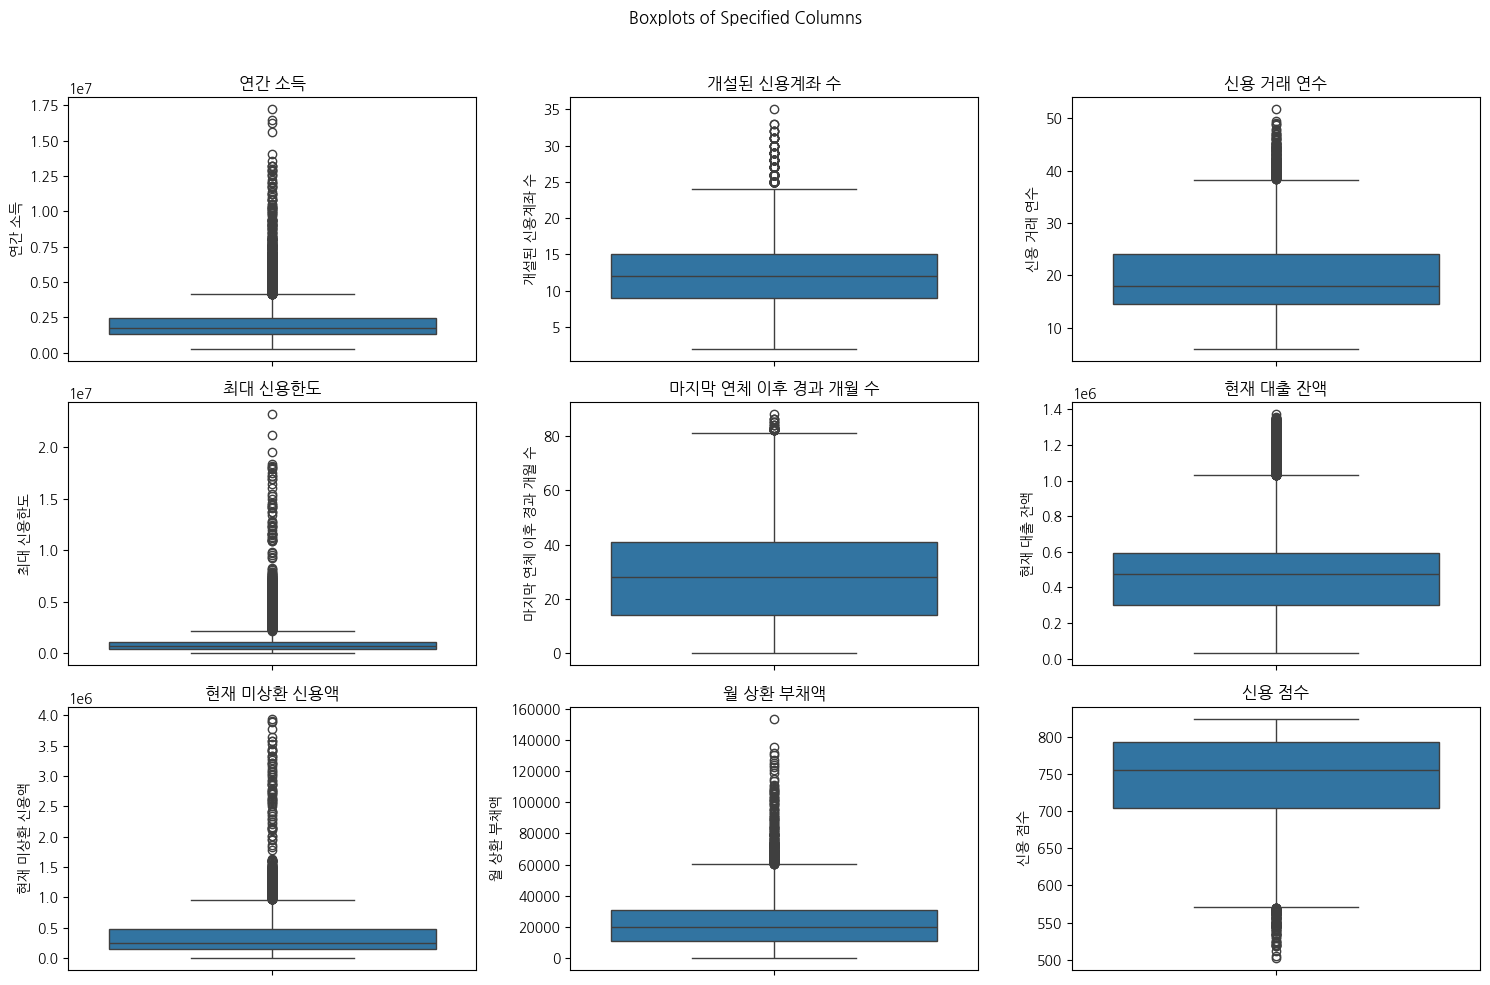

In [74]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_num[column])
    plt.title(column)

plt.suptitle('Boxplots of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [76]:
outlier_counts = {}

for column in columns_to_plot:
    Q1 = train_num[column].quantile(0.25)
    Q3 = train_num[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_num[(train_num[column] < lower_bound) | (train_num[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

print("이상치 개수:")
print()
for column, count in outlier_counts.items():
    print(f"{column}: {count} 개")
    print(f'비율: {count/10000}')
    print()

이상치 개수:

연간 소득: 908 개
비율: 0.0908

개설된 신용계좌 수: 182 개
비율: 0.0182

신용 거래 연수: 194 개
비율: 0.0194

최대 신용한도: 1045 개
비율: 0.1045

마지막 연체 이후 경과 개월 수: 27 개
비율: 0.0027

현재 대출 잔액: 877 개
비율: 0.0877

현재 미상환 신용액: 660 개
비율: 0.066

월 상환 부채액: 199 개
비율: 0.0199

신용 점수: 108 개
비율: 0.0108



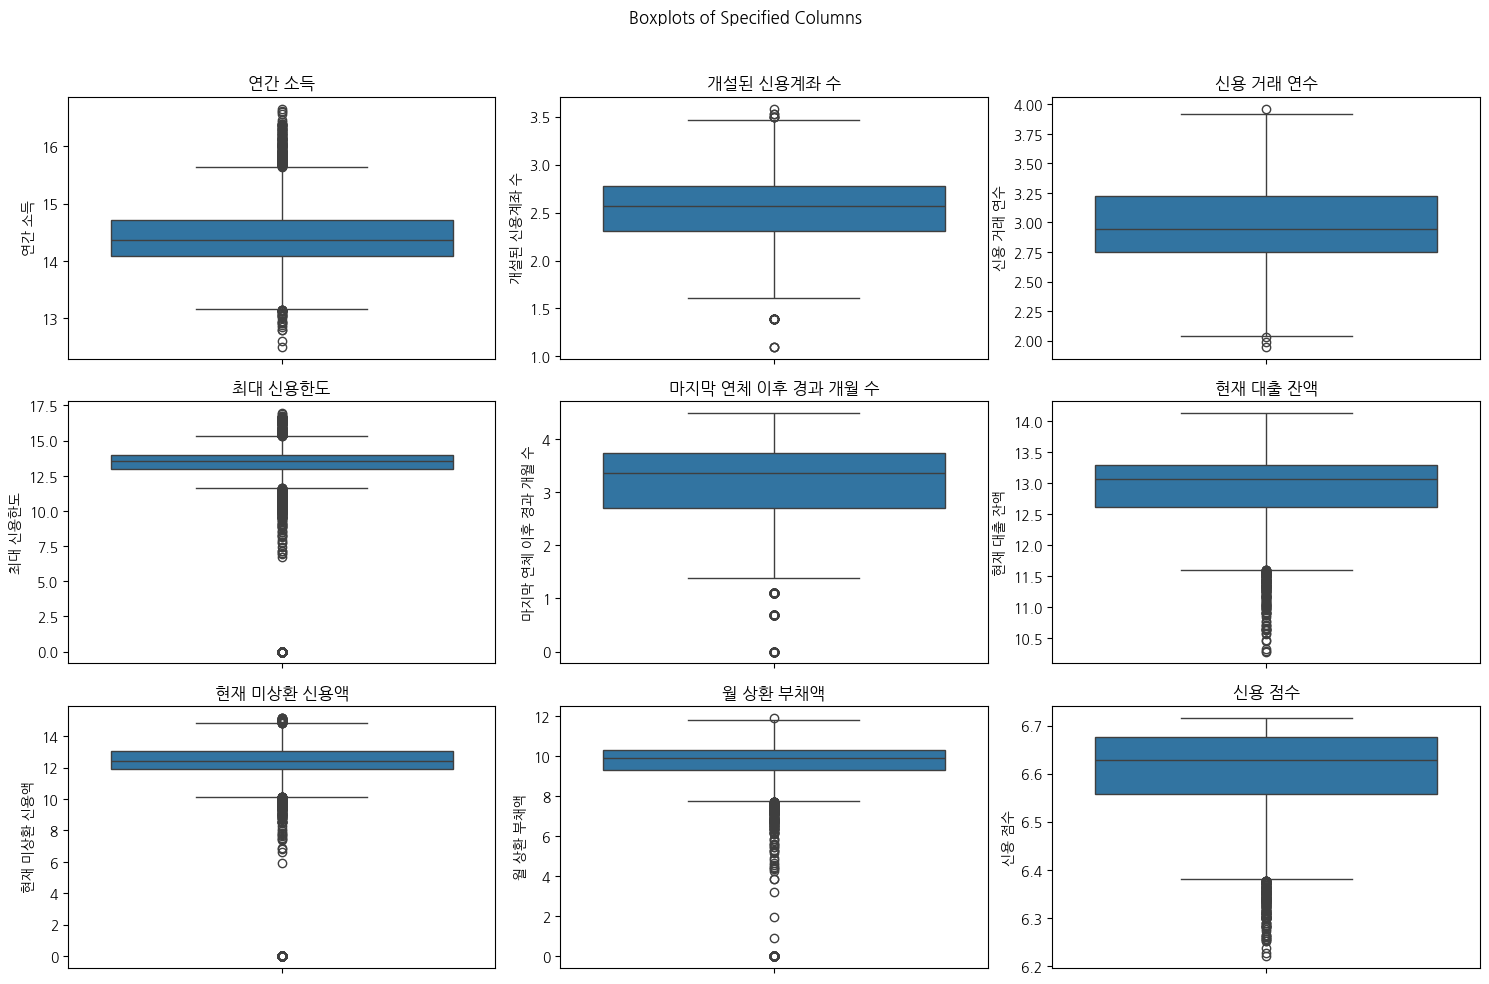

In [75]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=np.log1p(train_num[column]))
    plt.title(column)

plt.suptitle('Boxplots of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [81]:
for column in columns_to_plot:
    train_num[column + '_log'] = np.log1p(train_num[column])

outlier_counts = {}

for column in columns_to_plot:
    Q1 = train_num[column + '_log'].quantile(0.25)
    Q3 = train_num[column + '_log'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_num[(train_num[column + '_log'] < lower_bound) | (train_num[column + '_log'] > upper_bound)]
    outlier_counts[column + '_log'] = outliers.shape[0]

print("이상치 개수:")
print()

for column, count in outlier_counts.items():
    print(f"{column}: {count} 개")
    print(f'비율: {count/10000}')
    print()

이상치 개수:

연간 소득_log: 229 개
비율: 0.0229

개설된 신용계좌 수_log: 31 개
비율: 0.0031

신용 거래 연수_log: 4 개
비율: 0.0004

최대 신용한도_log: 1213 개
비율: 0.1213

마지막 연체 이후 경과 개월 수_log: 158 개
비율: 0.0158

현재 대출 잔액_log: 161 개
비율: 0.0161

현재 미상환 신용액_log: 323 개
비율: 0.0323

월 상환 부채액_log: 302 개
비율: 0.0302

신용 점수_log: 166 개
비율: 0.0166



In [ ]:
# 이상치 살릴거: 최대 신용한도
# 최대 신용한도_is_outlier 생성 후 표시
# 원래 컬럼의 이상치를 중앙값으로 대체체

# 이상치 버릴거: 연간 소득, 개설된 신용계좌 수, 신용 거래 연수, 마지막 연체 이후 경과 개월 수, 현재 대출 잔액, 현재 미상환 신용액, 월 상환 부채액, 신용 점수

c:\dev\ML\prediction-of-default\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\dev\ML\prediction-of-default\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\dev\ML\prediction-of-default\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\dev\ML\prediction-of-default\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


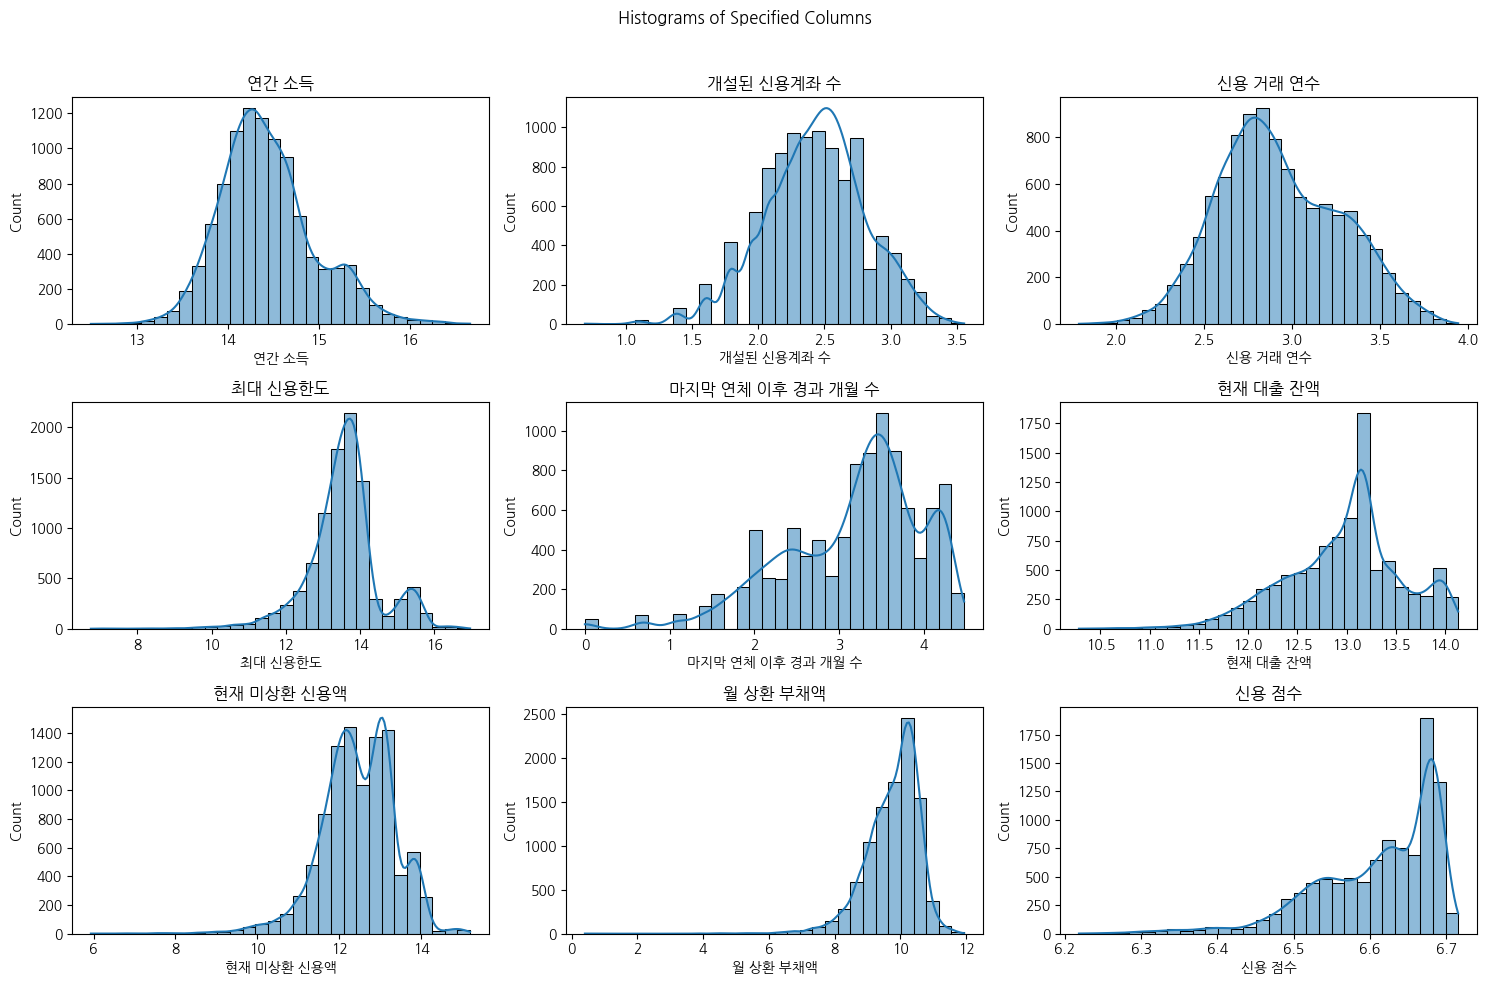

In [43]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(np.log(train_num[column]), bins=30, kde=True)
    plt.title(column)

plt.suptitle('Histograms of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Axes: >

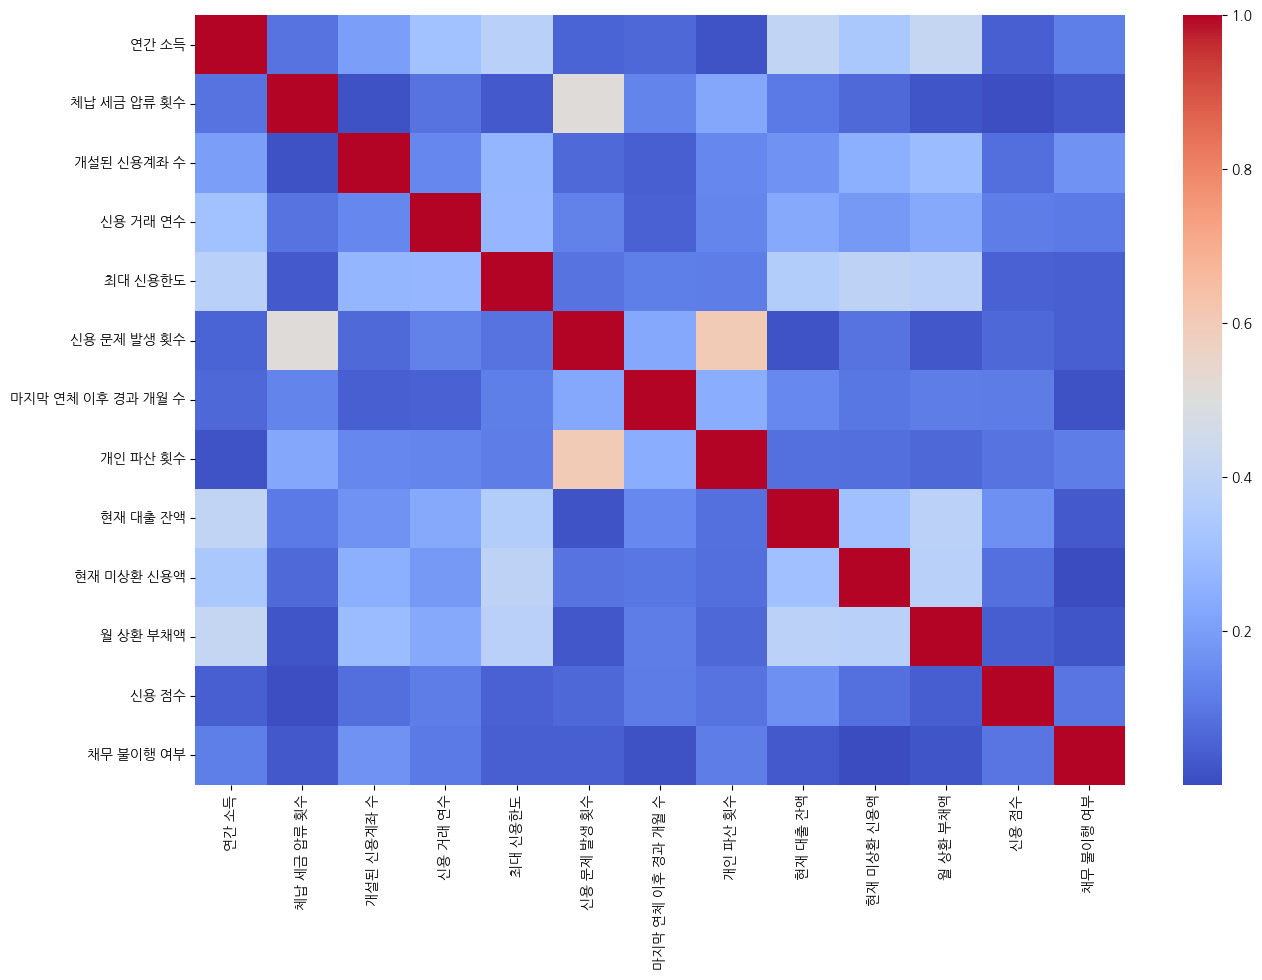

In [ ]:
# 상관관계
train_corr = abs(train_num.corr())
plt.figure(figsize=(15,10))
sns.heatmap(train_corr, cmap='coolwarm')

In [48]:
# 다중공선성 문제가 발생할 수 있는 변수들이 없음

In [49]:
train_obj.head()

,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간
0,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환
1,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환
2,TRAIN_00002,월세,4년,부채 통합,단기 상환
3,TRAIN_00003,월세,6년,부채 통합,단기 상환
4,TRAIN_00004,월세,2년,부채 통합,장기 상환
